In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import time
from matplotlib import pyplot

In [33]:
user_data=read_csv('userData',sep='\t', names=['averageDeltaClickTime','averageDeltaDwellTime','averageDeltaFlightTime',
                                      'averageDwellTime','averageFlightTime','averageMouseAcceleration','averageMouseCurvature',
                                      'averageMouseSpeed','deltaClickTimeInterQuartileRange','deltaClickTimeKurtosis','deltaClickTimeSkewness',
                                      'deltaClickTimeVariance','dwellTimeInterQuartileRange','dwellTimeKurtosis','dwellTimeSkewness',
                                      'dwellTimeVariance','flightTimeInterQuartileRange','flightTimeKurtosis','flightTimeSkewness',
                                      'flightTimeVariance','mouseAccelerationInterQuartileRange','mouseAccelerationKurtosis',
                                      'mouseAccelerationSkewness','mouseAccelerationVariance','mouseCurvatureInterQuartileRange',
                                      'mouseCurvatureKurtosis','mouseCurvatureSkewness','mouseCurvatureVariance',
                                      'mouseSpeedInterQuartileRange',
                                      'mouseSpeedKurtosis','mouseSpeedSkewness','mouseSpeedVariance'])
user_data=user_data.sample(frac=0.002)
user_data['class_label'] =0
bot_data=read_csv('botData', sep='\t', names=['averageDeltaClickTime','averageDeltaDwellTime','averageDeltaFlightTime',
                                      'averageDwellTime','averageFlightTime','averageMouseAcceleration','averageMouseCurvature',
                                      'averageMouseSpeed','deltaClickTimeInterQuartileRange','deltaClickTimeKurtosis','deltaClickTimeSkewness',
                                      'deltaClickTimeVariance','dwellTimeInterQuartileRange','dwellTimeKurtosis','dwellTimeSkewness',
                                      'dwellTimeVariance','flightTimeInterQuartileRange','flightTimeKurtosis','flightTimeSkewness',
                                      'flightTimeVariance','mouseAccelerationInterQuartileRange','mouseAccelerationKurtosis',
                                      'mouseAccelerationSkewness','mouseAccelerationVariance','mouseCurvatureInterQuartileRange',
                                      'mouseCurvatureKurtosis','mouseCurvatureSkewness','mouseCurvatureVariance',
                                      'mouseSpeedInterQuartileRange',
                                      'mouseSpeedKurtosis','mouseSpeedSkewness','mouseSpeedVariance'])
bot_data=bot_data.sample(frac=1)
bot_data['class_label']=1


In [34]:
frames=[user_data, bot_data]
data=pd.concat(frames)
data=data.sample(frac=1)
dataset=data.values

In [35]:
X=dataset[:, :4]
y=dataset[:,-1]
#Encode string class as integers
label_encoded_y=LabelEncoder().fit_transform(y)

1 0.03746795654296875
2 0.020099878311157227
3 0.017596006393432617
4 0.019011974334716797


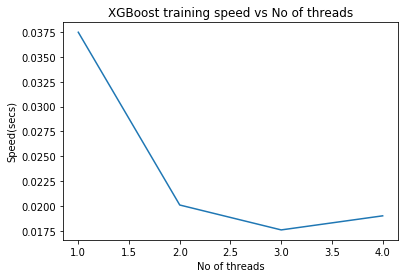

In [36]:
result=[]
num_threads=[1,2,3,4]
for n in num_threads:
    start=time.time()
    model=XGBClassifier(nthread=n)
    model.fit(X,label_encoded_y)
    elapsed=time.time()-start
    print(n,elapsed)
    result.append(elapsed)
pyplot.plot(num_threads,result)
pyplot.ylabel('Speed(secs)')
pyplot.xlabel('No of threads')
pyplot.title("XGBoost training speed vs No of threads")
pyplot.show()

In [37]:
from sklearn.model_selection import train_test_split
seed=7
test_size=0.33
X_train, X_test, y_train, y_test=train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

In [38]:
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
predictions=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy *100))

Accuracy: 57.84%


In [40]:
#K-Fold validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [41]:
#Parallel thread XGBoost and CV
start=time.time()
model=XGBClassifier(nthread=-1)
results=cross_val_score(model, X, label_encoded_y,cv=kfold,  n_jobs=-1)
elapsed=time.time()-start
print(results)
print("Parallel thread XGBoost and CV: %f sec" % (elapsed))

[ 0.53125     0.71875     0.71875     0.64516129  0.48387097  0.67741935
  0.66666667  0.4         0.7         0.7       ]
Parallel thread XGBoost and CV: 0.832322 sec
